# data-discovery

The purpose of this notebook will be inspect and assess the quality of the credit card fraud data set. 

## isntall dependancies

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# read in data from parquet
cc = pd.read_parquet('../data/creditcard.parquet')

display(cc.info())

display(cc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  int32  
 1   amount  284807 non-null  float32
 2   class   284807 non-null  bool   
 3   v1      284807 non-null  float32
 4   v2      284807 non-null  float32
 5   v3      284807 non-null  float32
 6   v4      284807 non-null  float32
 7   v5      284807 non-null  float32
 8   v6      284807 non-null  float32
 9   v7      284807 non-null  float32
 10  v8      284807 non-null  float32
 11  v9      284807 non-null  float32
 12  v10     284807 non-null  float32
 13  v11     284807 non-null  float32
 14  v12     284807 non-null  float32
 15  v13     284807 non-null  float32
 16  v14     284807 non-null  float32
 17  v15     284807 non-null  float32
 18  v16     284807 non-null  float32
 19  v17     284807 non-null  float32
 20  v18     284807 non-null  float32
 21  v19     28

None

,time,amount,class,v1,v2,v3,v4,v5,v6,v7,...,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28
0,0,149.619995,False,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0,2.690000,False,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,1,378.660004,False,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1,123.500000,False,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,2,69.989998,False,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,0.770000,False,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,172787,24.790001,False,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,172788,67.879997,False,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,172788,10.000000,False,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [18]:
#check for missing values
missing_counts = cc.isna().sum()

display(missing_counts)

time      0
amount    0
class     0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
dtype: int64

In [19]:
# get number of distnit values
distinct_values = cc.nunique()

display(distinct_values)

time      124592
amount     32767
class          2
v1        274338
v2        275163
v3        275081
v4        275143
v5        275223
v6        275092
v7        275182
v8        275244
v9        275208
v10       275175
v11       275043
v12       275162
v13       275167
v14       275238
v15       275134
v16       275149
v17       275148
v18       275208
v19       275185
v20       275185
v21       275170
v22       275096
v23       275186
v24       275113
v25       275091
v26       275146
v27       275295
v28       275249
dtype: int64

In [20]:
# subset data frame into useful increment for visualization
cc_time_amount_class = cc[['time', 'amount', 'class']]
summary_stats = cc_time_amount_class.describe()

display(summary_stats)

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349609
std,47488.145955,250.120117
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165001
max,172792.000000,25691.160156


<module 'matplotlib.pyplot' from 'c:\\Users\\jpeck\\py\\fraud-detection\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

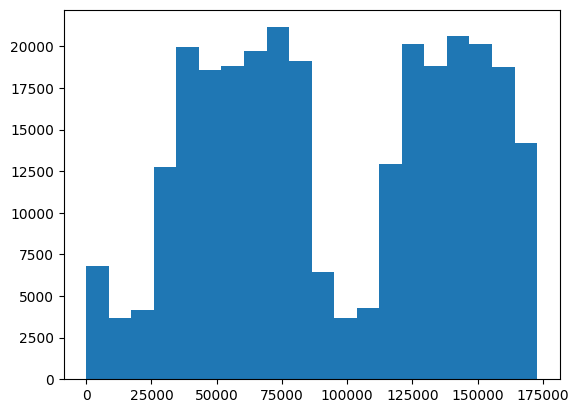

In [21]:
# plot time on histogram
plt.hist(cc['time'], bins=20)
display(plt)

<Axes: xlabel='time'>

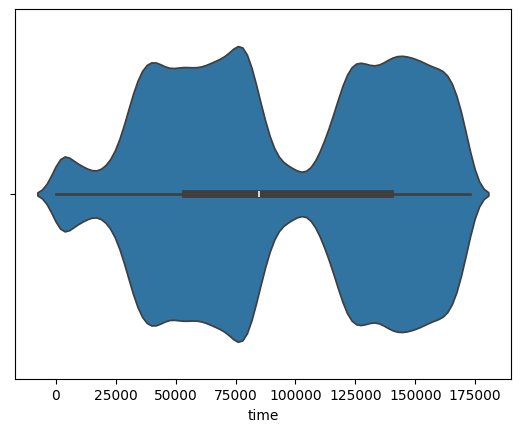

In [22]:
# plot time on box and whiskser plot
sns.violinplot(x=cc['time'])

(array([2.82968e+05, 1.42700e+03, 2.74000e+02, 8.60000e+01, 2.20000e+01,
        1.40000e+01, 8.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.        ,  1284.5579834 ,  2569.1159668 ,  3853.67382812,
         5138.23193359,  6422.79003906,  7707.34765625,  8991.90625   ,
        10276.46386719, 11561.02148438, 12845.58007812, 14130.13769531,
        15414.6953125 , 16699.25390625, 17983.8125    , 19268.36914062,
        20552.92773438, 21837.48632812, 23122.04296875, 24406.6015625 ,
        25691.16015625]),
 <BarContainer object of 20 artists>)

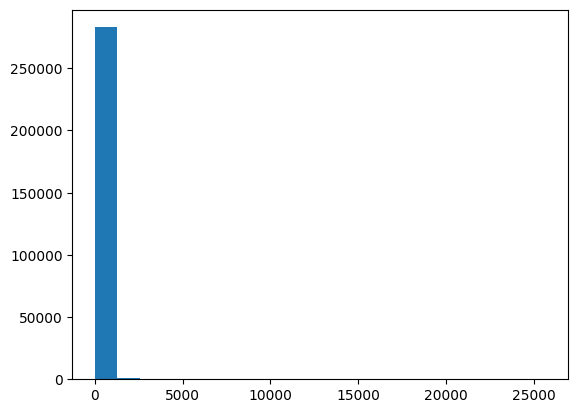

In [23]:
# plot amount on historgram
plt.hist(cc['amount'], bins=20)

In [30]:
# display counts of each distinct value of class
class_counts = cc['class'].value_counts()

print(class_counts)

# calcualte percentage of each class
class_counts = cc['class'].value_counts(normalize=True)
print()

# print class_counts as percentages
print("class Percenages")
print(f"0\t{class_counts.iloc[0]:.10%}")
print(f"0\t{class_counts.iloc[1]:.10%}")

class
False    284315
True        492
Name: count, dtype: int64

class Percenages
0	99.8272514369%
0	0.1727485631%


<Axes: xlabel='amount'>

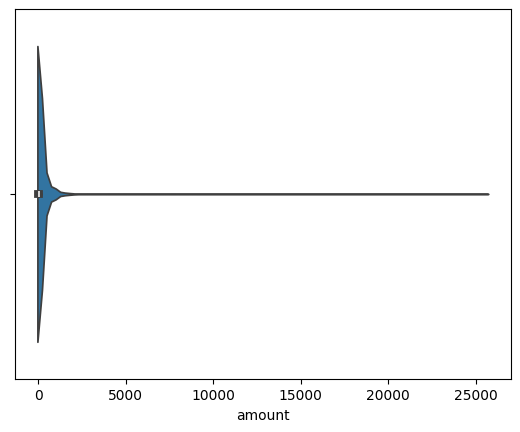

In [31]:
# plot amount on violin plot
sns.violinplot(x=cc['amount'])

In [32]:
# analayze v1-v7
cc_v1_v7 = cc[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7']]
summary_stats = cc_v1_v7.describe()
display(summary_stats)

,v1,v2,v3,v4,v5,v6,v7
count,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09
std,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00
min,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01
25%,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01
50%,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02
75%,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01
max,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02


,v1,v2,v3,v4,v5,v6,v7
count,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09
std,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00
min,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01
25%,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01
50%,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02
75%,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01
max,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02


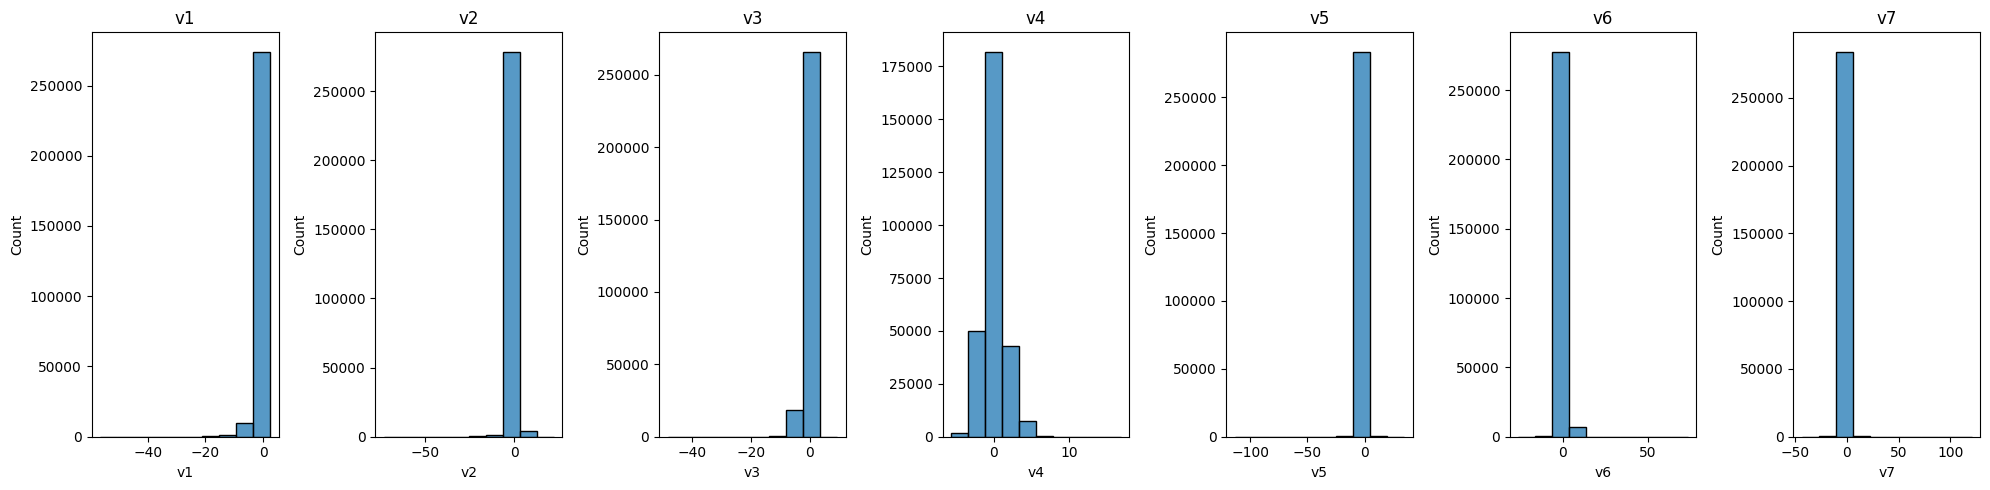

<Axes: >

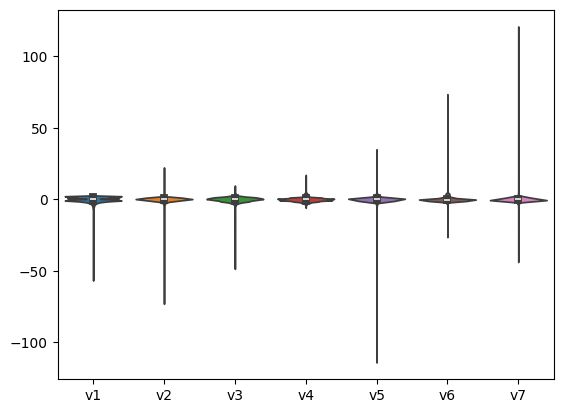

In [33]:
# analayze v1-v7
cc_v1_v7 = cc[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7']]
summary_stats = cc_v1_v7.describe()
display(summary_stats)

# display v1 through v7 as histogram
# Set up a grid of 7 subplots side by side (1 row, 7 columns)
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Loop through each column and plot the histogram on its respective subplot
for i, col in enumerate(cc_v1_v7.columns):
    sns.histplot(cc_v1_v7[col].dropna(), ax=axes[i], bins=10)  # You can adjust the number of bins as needed
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# plot v1 through v7
sns.violinplot(data=cc_v1_v7)

,v8,v9,v10,v11,v12,v13,v14
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.071518e-10,-3.214554e-10,-4.071768e-09,7.714928e-09,8.572143e-09,1.580489e-09,-3.107402e-09
std,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01
min,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921432e+01
25%,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01
50%,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02
75%,3.273458e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01
max,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01


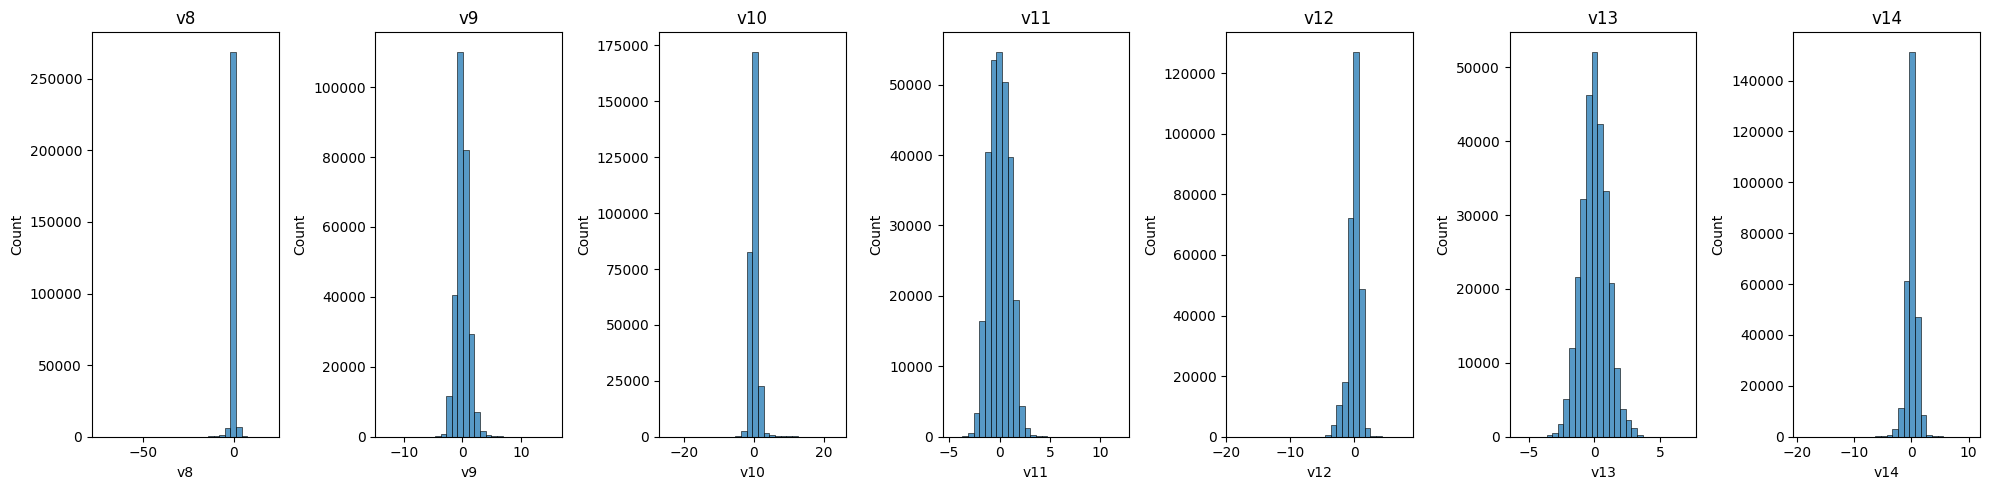

<Axes: >

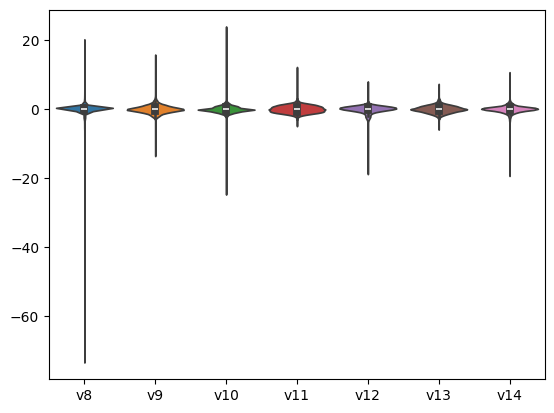

In [34]:
# analayze v8-v14
cc_v8_v14 = cc[['v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14']]
summary_stats = cc_v8_v14.describe()
display(summary_stats)

# display v1 through v7 as histogram
# Set up a grid of 7 subplots side by side (1 row, 7 columns)
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Loop through each column and plot the histogram on its respective subplot
for i, col in enumerate(cc_v8_v14.columns):
    sns.histplot(cc_v8_v14[col].dropna(), ax=axes[i], bins=30)  # You can adjust the number of bins as needed
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# plot v1 through v7
sns.violinplot(data=cc_v8_v14)

,v15,v16,v17,v18,v19,v20,v21
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.285821e-08,7.500625e-10,-2.625219e-09,2.357339e-09,2.678795e-10,-1.178670e-09,-1.928732e-09
std,9.153160e-01,8.762529e-01,8.493370e-01,8.381763e-01,8.140405e-01,7.709250e-01,7.345240e-01
min,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01
25%,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01
50%,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02
75%,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589493e-01,1.330408e-01,1.863772e-01
max,8.877742e+00,1.731511e+01,9.253527e+00,5.041069e+00,5.591971e+00,3.942091e+01,2.720284e+01


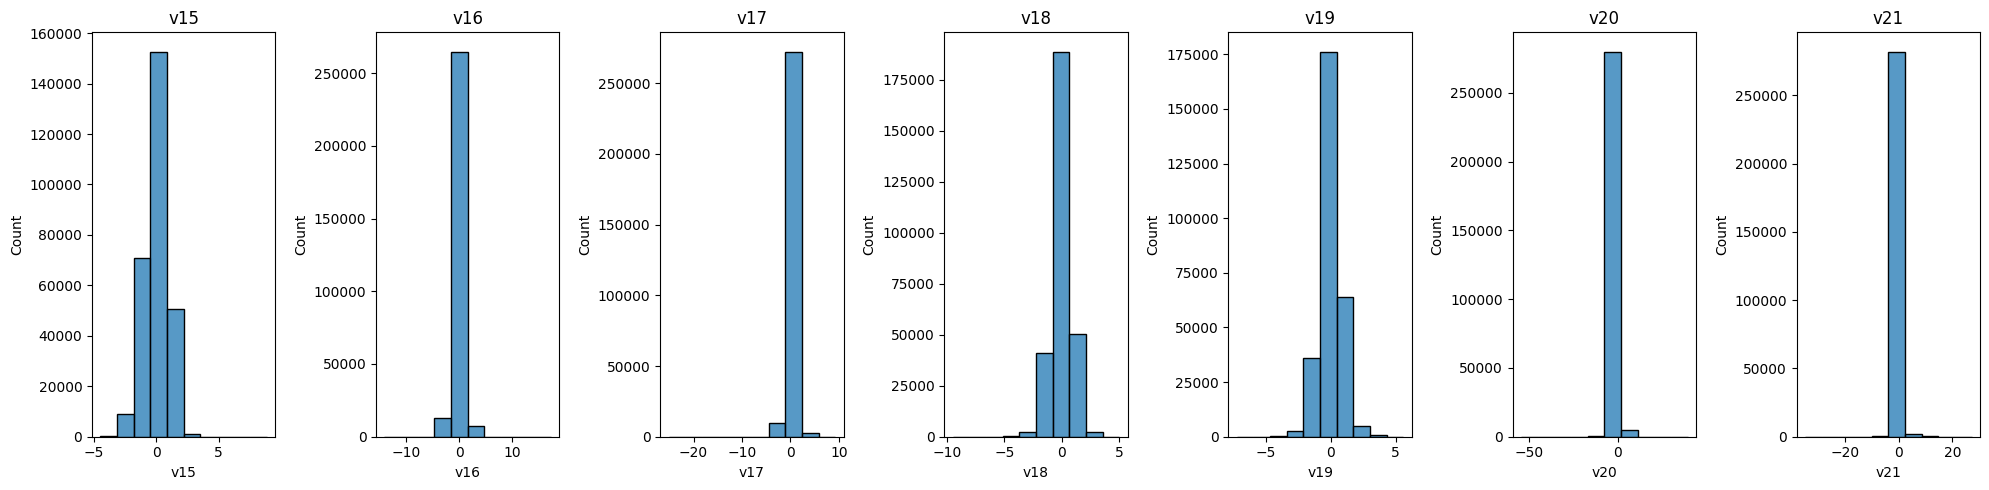

<Axes: >

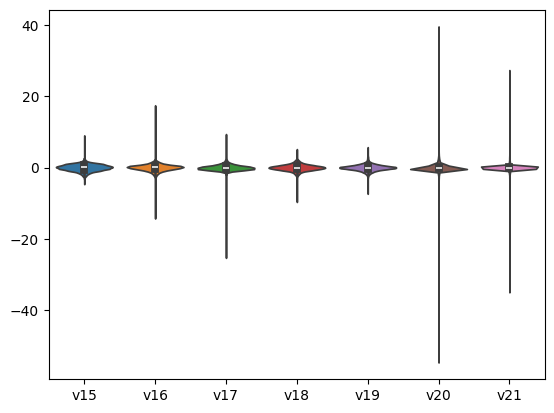

In [35]:
# analyze v15-v21
cc_v15_v21 = cc[['v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21']]
summary_stats = cc_v15_v21.describe()
display(summary_stats)

# display v1 through v7 as histogram
# Set up a grid of 7 subplots side by side (1 row, 7 columns)
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Loop through each column and plot the histogram on its respective subplot
for i, col in enumerate(cc_v15_v21.columns):
    sns.histplot(cc_v15_v21[col].dropna(), ax=axes[i], bins=10)  # You can adjust the number of bins as needed
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# plot v1 through v7
sns.violinplot(data=cc_v15_v21)

,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16
std,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


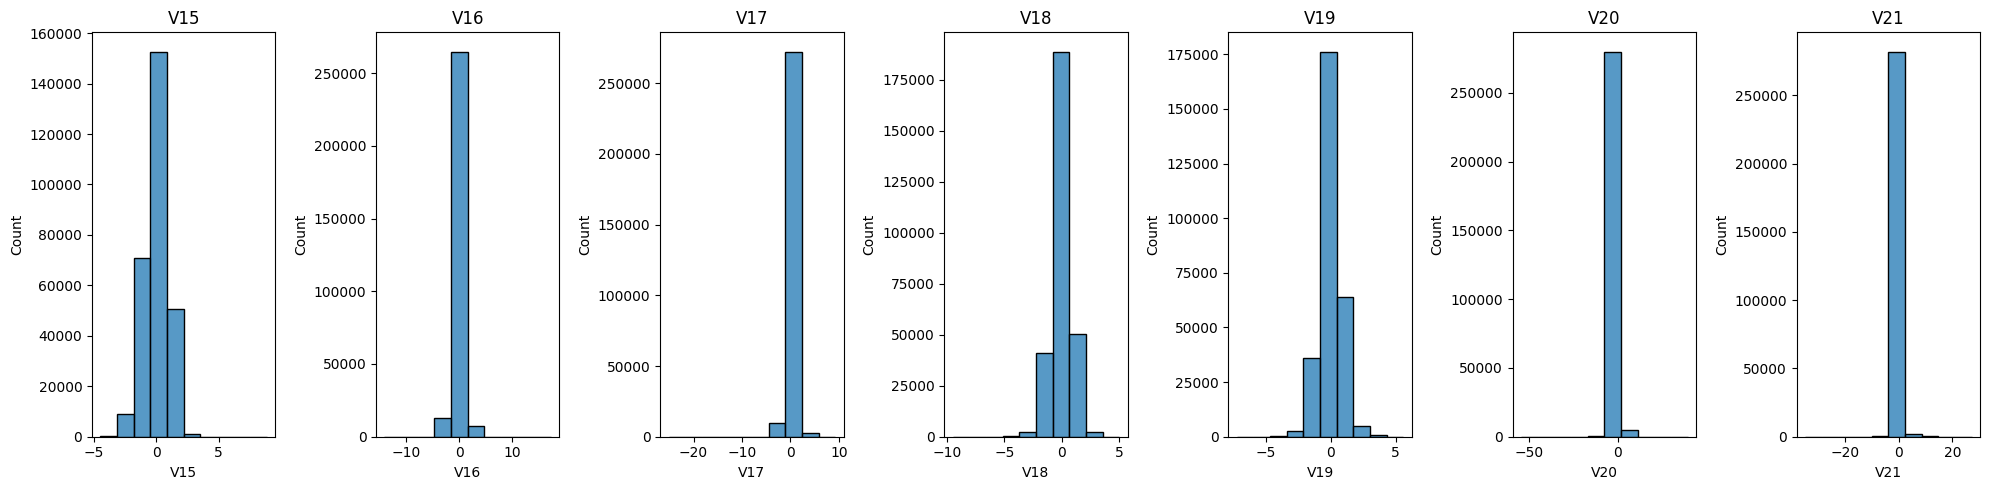

<Axes: >

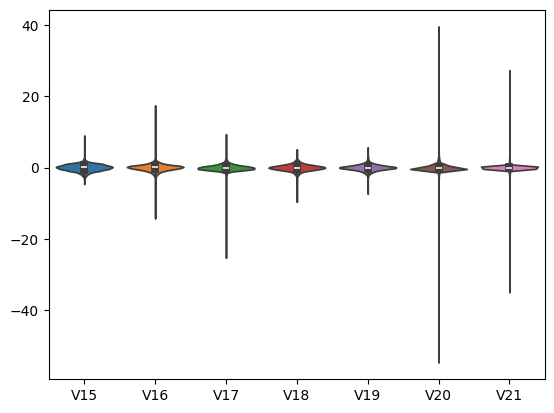

In [110]:
# analyze v15-v21
cc_v22_v28 = cc[['v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28']]
summary_stats = cc_v22_v28.describe()
display(summary_stats)

# display v1 through v7 as histogram
# Set up a grid of 7 subplots side by side (1 row, 7 columns)
fig, axes = plt.subplots(1, 7, figsize=(20, 5))

# Loop through each column and plot the histogram on its respective subplot
for i, col in enumerate(cc_v15_v21.columns):
    sns.histplot(cc_v15_v21[col].dropna(), ax=axes[i], bins=10)  # You can adjust the number of bins as needed
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# plot v1 through v7
sns.violinplot(data=cc_v15_v21)

In [37]:
# perform logistic regression for class
X = cc.drop('class', axis=1)  # Features
y = cc['class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

# note that a high number of iterations is needed for convergence
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [17]:
# print results
print("R-squared:", accuracy)

# print the confusion matrix in a formatted table
print("Confusion Matrix:\n", confusion_mat)
print("classification Report:\n", classification_rep)   

# print talbe of the coefficients that contains their names
coef_table = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
# sort table by largest coefficients
coef_table = coef_table.sort_values(by='Coefficient', ascending=False)
display(coef_table)

# print the intercepts in a tabl the shows their names
intercept_table = pd.DataFrame({'Intercept': model.intercept_})
display(intercept_table)

# print the p values for all the coefficients
p_values = pd.DataFrame()
p_values['Feature'] = X.columns
p_values['P-value'] = model.coef_[0]
p_values['P-value'] = p_values['P-value'].apply(lambda x: x if x > 0 else -x)
p_values = p_values.sort_values(by='P-value', ascending=True)
display(p_values)


R-squared: 0.9987008883115059
Confusion Matrix:
 [[56833    31]
 [   43    55]]
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.56      0.60        98

    accuracy                           1.00     56962
   macro avg       0.82      0.78      0.80     56962
weighted avg       1.00      1.00      1.00     56962



,Feature,Coefficient
1,v1,0.359426
22,v22,0.349503
7,v7,0.297748
21,v21,0.256829
4,v4,0.223809
5,v5,0.190546
20,v20,0.061312
28,v28,0.059167
19,v19,0.057657
23,v23,0.046147


,Intercept
0,-1.569607


,Feature,P-value
0,time,0.000099
29,amount,0.009444
24,v24,0.022304
12,v12,0.023725
26,v26,0.044318
23,v23,0.046147
18,v18,0.047381
19,v19,0.057657
28,v28,0.059167
20,v20,0.061312
